In [2]:
from pepfun import *

In [5]:
#https://qiita.com/ottantachinque/items/c2b2e2528f097afe8eeb
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, BRICS, Recap

In [34]:
suppl = Chem.SDMolSupplier('logSdataset1290_2d.sdf')
mols = [mol for mol in suppl if mol is not None]
mol = Chem.SDMolSupplier('CycrosporinA.sdf')

In [79]:
sequence = 'KALYDLQRSAMVYSS'
mol = Chem.MolFromFASTA(sequence)

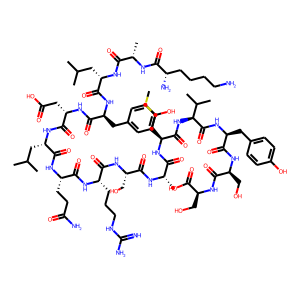

In [52]:
Draw.MolToImage(mol)

# RECAP

In [80]:
#RECAPの実行分解
decomp = Chem.Recap.RecapDecompose(mol)

In [81]:
#１段階目のフラグメント化で得られた分子を描画してみる。
first_gen = [node.mol for node in decomp.children.values()]
img = Draw.MolsToGridImage(first_gen, molsPerRow=4, legends=[Chem.MolToSmiles(m) for m in first_gen])
#img.save('first_gen.png')

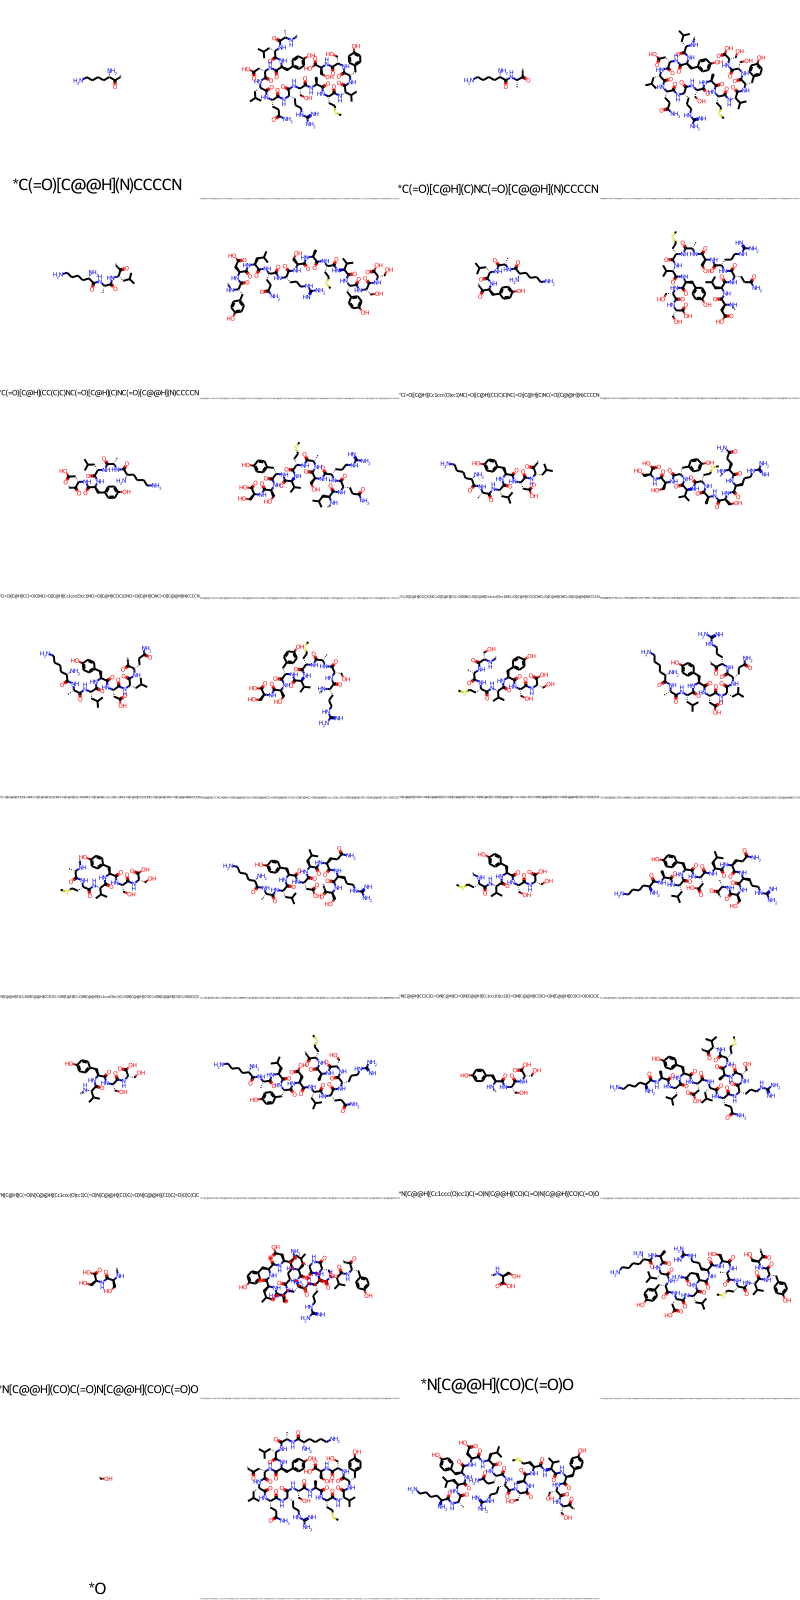

In [82]:
img

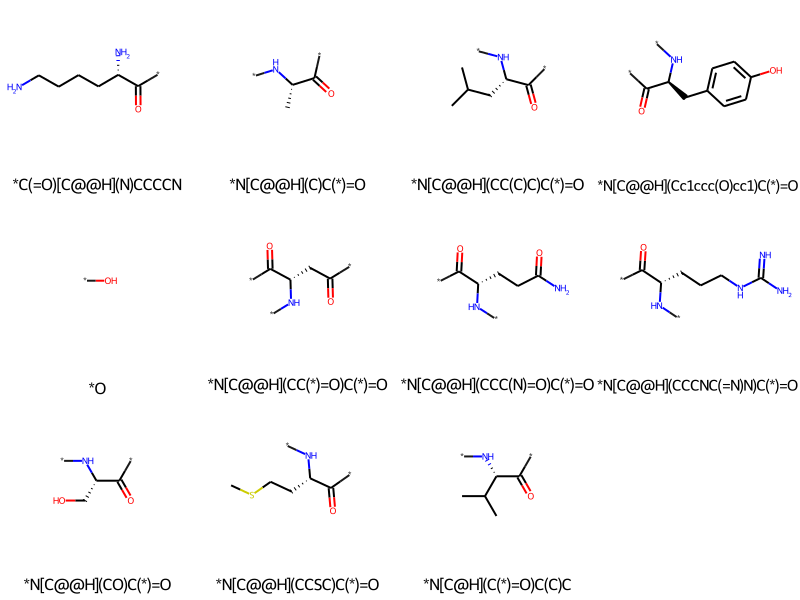

In [83]:
leaves = [leaf.mol for leaf in decomp.GetLeaves().values()]
img = Draw.MolsToGridImage(leaves, molsPerRow=4,legends=[Chem.MolToSmiles(m) for m in leaves])
img

In [100]:
frag1 = leaves[0]

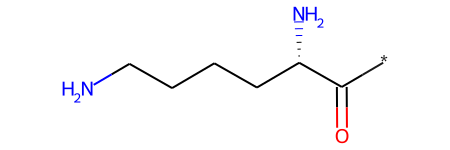

In [114]:
frag1

In [106]:
du = Chem.MolFromSmiles('*')
type(du)

rdkit.Chem.rdchem.Mol

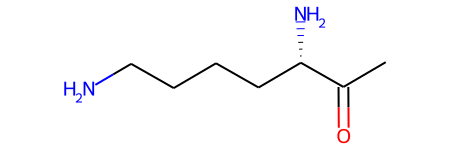

In [122]:
AllChem.ReplaceSubstructs(frag1,du,Chem.MolFromSmiles('C'), True)[0]

In [71]:
leaves_list = []
for mol in mols:
    decomp = Chem.Recap.RecapDecompose(mol)
    leaves = [leaf.mol for leaf in decomp.GetLeaves().values()]
    leaves_list = leaves_list + leaves

#smilesに変換して重複を削除する
leaves_list = list(set([Chem.MolToSmiles(mol) for mol in leaves_list]))
print('number of fragments:', len(leaves_list))
# >>>number of fragments: 537

#先頭10フラグメントだけ描画してみる
fragments10 = [Chem.MolFromSmiles(smiles) for smiles in leaves_list[:10]]
img = Draw.MolsToGridImage(fragments10, molsPerRow=3,legends=leaves_list[:10])
#img.save('fragments10_RECAP.png')

number of fragments: 537


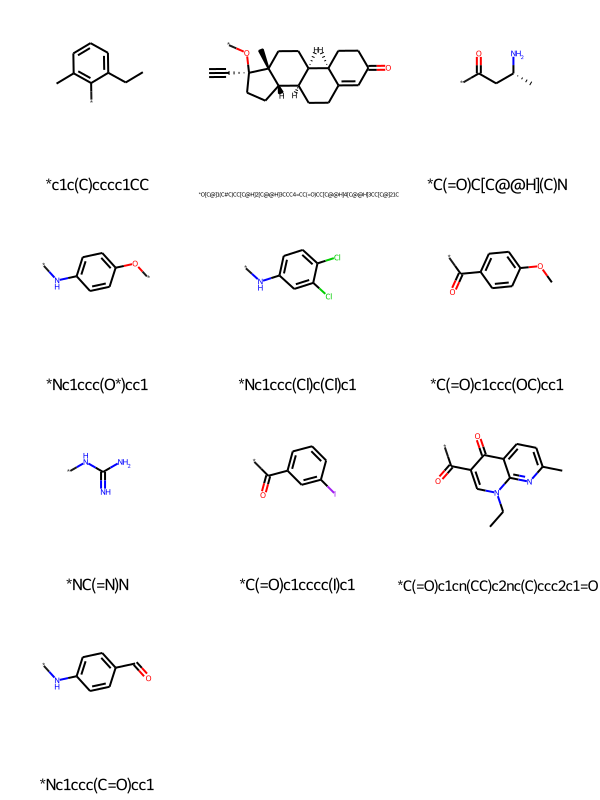

In [72]:
img

# BRICS

In [59]:
decomp = BRICS.BRICSDecompose(mol)
fragments = [Chem.MolFromSmiles(smiles) for smiles in decomp]

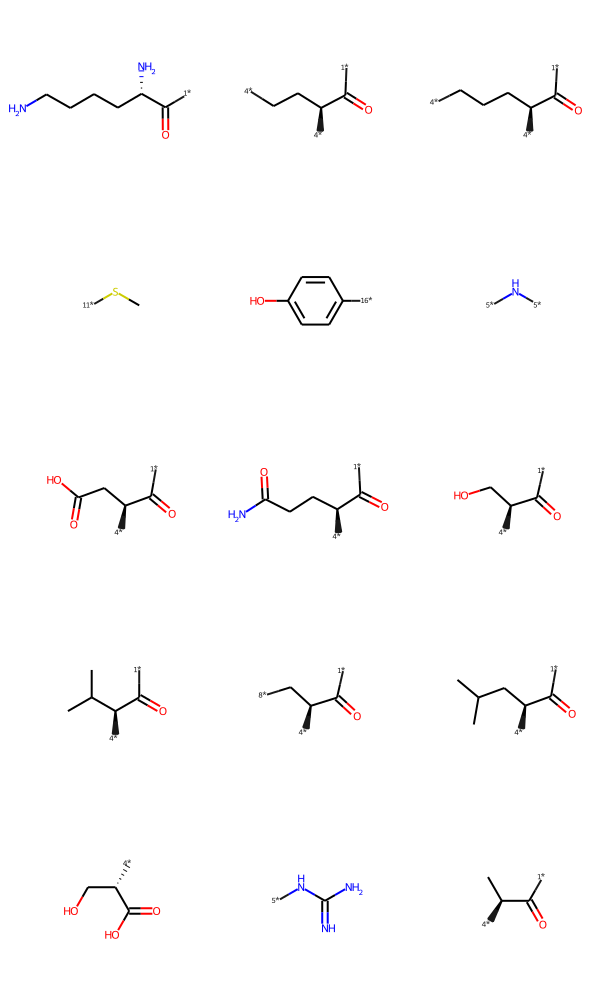

In [68]:
img = Draw.MolsToGridImage(fragments, molsPerRow=3)
img

In [66]:
fragment_set = set()
for mol in mols:
    fragment = BRICS.BRICSDecompose(mol)
    fragment_set = fragment_set | fragment

fragment_list = list(fragment_set)

print('number of fragments:', len(fragment_list))
# >>>number of fragments: 1121

#先頭10フラグメントだけ描画してみる
fragments10 = [Chem.MolFromSmiles(smiles) for smiles in fragment_list[:10]]
img = Draw.MolsToGridImage(fragments10, molsPerRow=5,legends=fragment_list[:10])
#img.save('fragments10_BRICS.png')

number of fragments: 1121


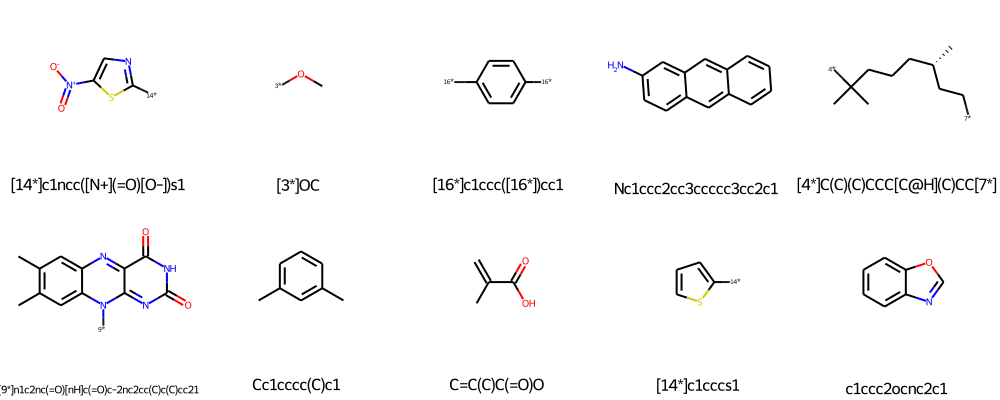

In [67]:
img

# peptide bond

In [84]:
mol = Chem.MolFromFASTA(sequence)